In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Layers

In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 7 classes for hand gestures
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the dataset

In [11]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    "D:/Drone/New folder (4)",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4800 images belonging to 6 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
    "D:/Drone/New folder (4)",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1199 images belonging to 6 classes.


In [14]:
# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=2)

Epoch 1/2
150/150 [==============================] - 162s 1s/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.5386 - val_accuracy: 0.8699
Epoch 2/2
150/150 [==============================] - 158s 1s/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.5040 - val_accuracy: 0.8874


In [15]:
# Save the trained model
model.save('hand_gesture_model05.h5')

C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Report 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Generate predictions for the validation dataset
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

38/38 [==============================] - 5s 133ms/step


In [18]:
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [19]:
confusion_mtx = confusion_matrix(y_true, y_pred)

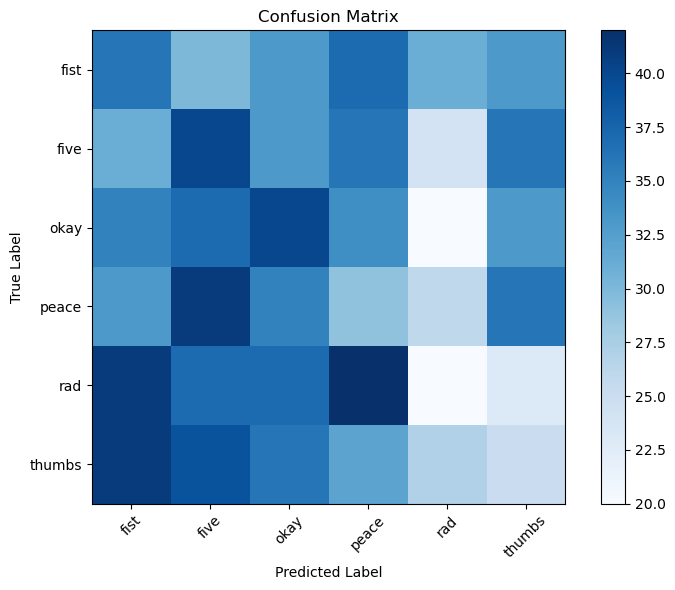

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [21]:
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

        fist       0.17      0.18      0.17       200
        five       0.18      0.20      0.19       200
        okay       0.19      0.20      0.19       199
       peace       0.14      0.14      0.14       200
         rad       0.14      0.10      0.11       200
      thumbs       0.13      0.12      0.13       200

    accuracy                           0.16      1199
   macro avg       0.16      0.16      0.16      1199
weighted avg       0.16      0.16      0.16      1199



# Test Model

1/1 [==============================] - 0s 78ms/step
Image: 434.png
Class: Fist, Probability: 0.0000
Class: Five, Probability: 0.0000
Class: Okay, Probability: 0.0000
Class: Peace, Probability: 0.0000
Class: Rad, Probability: 0.0000
Class: Thumbs, Probability: 1.0000
Predicted Class: Thumbs


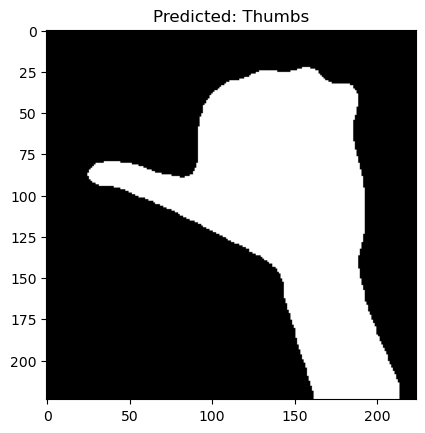

1/1 [==============================] - 0s 35ms/step
Image: 351.png
Class: Fist, Probability: 1.0000
Class: Five, Probability: 0.0000
Class: Okay, Probability: 0.0000
Class: Peace, Probability: 0.0000
Class: Rad, Probability: 0.0000
Class: Thumbs, Probability: 0.0000
Predicted Class: Fist


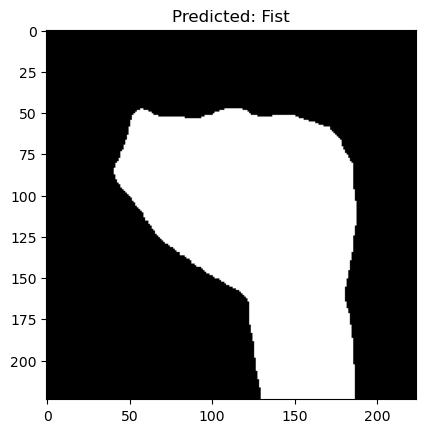

1/1 [==============================] - 0s 34ms/step
Image: 667.png
Class: Fist, Probability: 0.0000
Class: Five, Probability: 0.9997
Class: Okay, Probability: 0.0002
Class: Peace, Probability: 0.0000
Class: Rad, Probability: 0.0000
Class: Thumbs, Probability: 0.0000
Predicted Class: Five


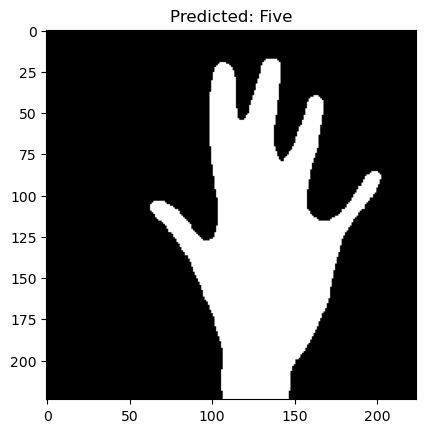

1/1 [==============================] - 0s 34ms/step
Image: 443.png
Class: Fist, Probability: 0.0000
Class: Five, Probability: 0.0000
Class: Okay, Probability: 1.0000
Class: Peace, Probability: 0.0000
Class: Rad, Probability: 0.0000
Class: Thumbs, Probability: 0.0000
Predicted Class: Okay


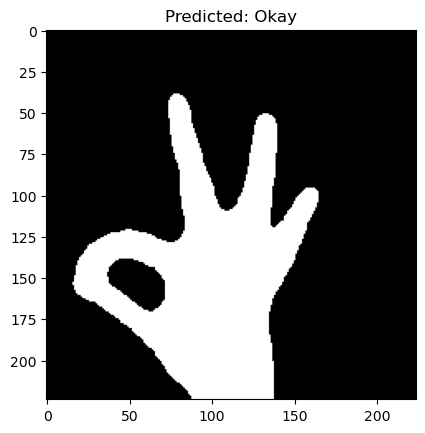

1/1 [==============================] - 0s 34ms/step
Image: 263.png
Class: Fist, Probability: 0.0000
Class: Five, Probability: 0.0000
Class: Okay, Probability: 0.0000
Class: Peace, Probability: 1.0000
Class: Rad, Probability: 0.0000
Class: Thumbs, Probability: 0.0000
Predicted Class: Peace


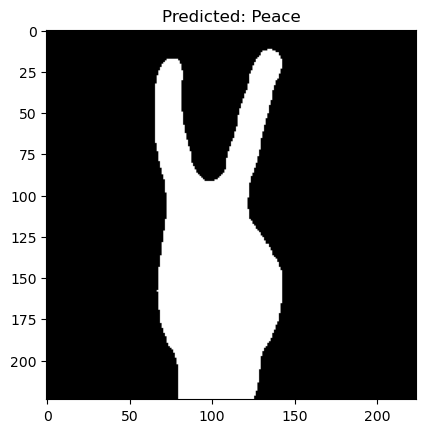

In [22]:
import random
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model05.h5')
class_names = ["Fist", "Five", "Okay", "Peace", "Rad","Thumbs"]

# Test on random images
test_dir = "D:/Drone/New folder (4)/Test"
test_images = random.sample(os.listdir(test_dir), 5)  # Choose 5 random images
for image_file in test_images:
    image_path = os.path.join(test_dir, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    print("Image:", image_file)
    
    for i, class_prob in enumerate(prediction[0]):
        class_name = class_names[i]
        print(f"Class: {class_name}, Probability: {class_prob:.4f}")
    
    print("Predicted Class:", class_names[predicted_class])
    plt.imshow(img)
    plt.title("Predicted: " + class_names[predicted_class])
    plt.show()

# OpenCV + cvzone

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier('hand_gesture_model05.h5', "Labels05.txt")

offset = 20
imgSize = 300

counter = 0

labels = ["Fist", "Five", "Okay", "Peace", "Rad","Thumbs"]

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands = detector.findHands(img, draw=False)
    
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize

        modelImg = imgWhite.copy()
        gray = cv2.cvtColor(modelImg, cv2.COLOR_BGR2GRAY)
        gray_inverted = cv2.bitwise_not(gray)
        contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        _, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

        # Convert binary image to 3-channel grayscale
        binary_rgb = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

        prediction, index = classifier.getPrediction(binary_rgb, draw=False)
        print(prediction, index)

        cv2.rectangle(imgOutput, (x - offset, y - offset - 50),
                      (x - offset + 90, y - offset - 50 + 50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y - 26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x - offset, y - offset),
                      (x + w + offset, y + h + offset), (255, 0, 255), 4)

        cv2.imshow("Segmentation", binary)
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", imgOutput)
    key = cv2.waitKey(1)
    # Exit when 'q' is pressed
    if key & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 212ms/step
[2.595874e-13, 5.866067e-22, 1.8247907e-11, 3.5999612e-09, 6.016807e-28, 1.0] 5
1/1 [==============================] - 0s 37ms/step
[1.2421281e-05, 2.9261424e-13, 0.9999821, 4.3486452e-07, 1.0589715e-22, 4.9925484e-06] 2
1/1 [==============================] - 0s 42ms/step
[2.2249415e-05, 3.7830603e-07, 0.9652115, 0.034577455, 2.4381173e-18, 0.00018851212] 2
1/1 [==============================] - 0s 38ms/step
[1.2916717e-05, 2.4266722e-11, 0.999987, 1.6126292e-07, 3.5261687e-12, 4.77918e-14] 2
1/1 [==============================] - 0s 36ms/step
[1.25096085e-05, 6.4642036e-06, 0.9999231, 5.7857087e-05, 9.498715e-20, 2.6421038e-16] 2
1/1 [==============================] - 0s 36ms/step
[9.779988e-14, 3.0044077e-18, 4.314729e-06, 0.9999957, 4.1757134e-25, 1.6846452e-14] 3
1/1 [==============================] - 0s 37ms/step
[3.6751738e-13, 2.8720096e-18, 0.011033818, 0.98896617, 1.6878883e-21, 2.6935253e-14] 3
1/1 [========================

1/1 [==============================] - 0s 35ms/step
[3.7457838e-07, 4.0060427e-11, 0.99999964, 8.071391e-10, 4.656428e-17, 1.20657e-08] 2
1/1 [==============================] - 0s 37ms/step
[4.3942677e-05, 9.220546e-15, 0.1841574, 1.065629e-07, 4.511616e-15, 0.8157985] 5
1/1 [==============================] - 0s 34ms/step
[0.072102204, 1.5846019e-05, 0.00042813455, 0.00014460245, 0.0023581178, 0.9249511] 5
1/1 [==============================] - 0s 36ms/step
[0.9999231, 1.1501995e-12, 1.2930021e-08, 6.839302e-10, 1.8184612e-09, 7.685387e-05] 0
1/1 [==============================] - 0s 35ms/step
[1.0, 1.8086733e-16, 3.7694468e-13, 4.8026146e-15, 6.733596e-13, 2.8206086e-08] 0
1/1 [==============================] - 0s 39ms/step
[1.0, 5.4637887e-16, 2.5183455e-13, 5.646205e-15, 1.0708094e-11, 1.5124089e-08] 0
1/1 [==============================] - 0s 38ms/step
[1.0, 1.8290791e-16, 4.699543e-13, 4.4376954e-15, 1.6393541e-12, 1.3240468e-08] 0
1/1 [==============================] - 0s 36ms/st

1/1 [==============================] - 0s 37ms/step
[5.266189e-07, 0.7078025, 6.065094e-07, 0.29219583, 3.77512e-08, 5.66493e-07] 1
1/1 [==============================] - 0s 37ms/step
[5.44498e-07, 0.72857314, 6.508856e-07, 0.27142456, 3.8793036e-08, 1.0735558e-06] 1
1/1 [==============================] - 0s 37ms/step
[2.992819e-07, 0.6645543, 4.877652e-07, 0.33544436, 1.2380507e-08, 4.856713e-07] 1
1/1 [==============================] - 0s 37ms/step
[4.1691698e-07, 0.5698618, 5.3922764e-07, 0.43013623, 3.624364e-08, 9.338412e-07] 1
1/1 [==============================] - 0s 38ms/step
[4.7912306e-07, 0.7271612, 4.3309194e-07, 0.27283686, 3.013855e-08, 1.0135512e-06] 1
1/1 [==============================] - 0s 37ms/step
[3.3925394e-07, 0.5526154, 9.162382e-07, 0.44738248, 7.2953604e-08, 8.074708e-07] 1
1/1 [==============================] - 0s 37ms/step
[5.285321e-07, 0.69211644, 1.2150715e-06, 0.30787966, 3.4271668e-08, 2.0776138e-06] 1
1/1 [==============================] - 0s 35ms/ste

1/1 [==============================] - 0s 37ms/step
[6.260537e-07, 0.37010127, 6.251337e-07, 0.6298974, 1.08121005e-08, 6.350011e-09] 3
1/1 [==============================] - 0s 36ms/step
[8.112259e-07, 0.37744552, 1.9738063e-06, 0.62255174, 1.14696235e-08, 8.568179e-09] 3
1/1 [==============================] - 0s 36ms/step
[2.7891386e-07, 0.40992337, 6.0351374e-07, 0.59007573, 5.0853433e-09, 8.005253e-09] 3
1/1 [==============================] - 0s 35ms/step
[3.6841405e-07, 0.35963243, 1.097822e-06, 0.6403662, 5.217173e-09, 9.698857e-09] 3
1/1 [==============================] - 0s 36ms/step
[3.6553755e-07, 0.4950768, 5.9097505e-07, 0.5049222, 6.523866e-09, 1.1446575e-08] 3
1/1 [==============================] - 0s 35ms/step
[2.0778322e-07, 0.27854952, 1.2152079e-06, 0.721449, 3.8123917e-09, 1.6761874e-08] 3
1/1 [==============================] - 0s 37ms/step
[3.9031656e-07, 0.24110892, 3.4171965e-06, 0.7588873, 6.2836603e-09, 2.0160208e-08] 3
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 38ms/step
[4.5895312e-17, 0.9999485, 2.0601613e-07, 5.1284485e-05, 1.1470299e-20, 1.4555694e-18] 1
1/1 [==============================] - 0s 38ms/step
[1.2497264e-16, 0.99998665, 6.918471e-07, 1.2608477e-05, 2.909476e-21, 4.7842917e-19] 1
1/1 [==============================] - 0s 37ms/step
[6.920957e-16, 0.9998241, 3.495009e-05, 0.00014095208, 1.7290004e-20, 3.1416574e-18] 1
1/1 [==============================] - 0s 36ms/step
[1.4551359e-14, 0.86453986, 0.13538273, 7.735345e-05, 3.947184e-19, 2.4910765e-16] 1
1/1 [==============================] - 0s 35ms/step
[6.5893715e-14, 0.7980237, 0.20181587, 0.00016041908, 4.0439035e-19, 1.662995e-16] 1
1/1 [==============================] - 0s 36ms/step
[1.2441336e-13, 0.4102322, 0.5894973, 0.00027057048, 1.3960547e-18, 5.97667e-16] 2
1/1 [==============================] - 0s 36ms/step
[1.112783e-13, 0.15402627, 0.84573674, 0.00023703622, 2.6283648e-19, 5.38371e-16] 2
1/1 [==============================

1/1 [==============================] - 0s 38ms/step
[3.5287033e-14, 0.9990915, 0.0008202004, 8.829505e-05, 1.2102383e-16, 1.1801613e-17] 1
1/1 [==============================] - 0s 37ms/step
[2.1417692e-14, 0.9983675, 0.0015482828, 8.422151e-05, 4.595879e-16, 4.8373154e-18] 1
1/1 [==============================] - 0s 37ms/step
[3.703236e-15, 0.9997322, 0.00025229322, 1.544253e-05, 1.04896554e-16, 1.5410474e-18] 1
1/1 [==============================] - 0s 37ms/step
[1.5690184e-14, 0.9950217, 0.0048076063, 0.00017068532, 3.4347437e-16, 1.241033e-17] 1
1/1 [==============================] - 0s 38ms/step
[1.3767796e-14, 0.99899787, 0.0009845782, 1.7528e-05, 4.0933446e-17, 3.0812953e-18] 1
1/1 [==============================] - 0s 40ms/step
[8.990482e-16, 0.9998702, 0.00012116488, 8.6387045e-06, 1.862686e-17, 6.8345793e-19] 1
1/1 [==============================] - 0s 39ms/step
[1.395e-15, 0.9996044, 0.00039270797, 2.896329e-06, 8.017009e-18, 1.5892649e-18] 1
1/1 [===========================

1/1 [==============================] - 0s 37ms/step
[3.36458e-12, 0.20926127, 0.78738236, 0.003356321, 7.8213757e-16, 1.4420196e-14] 2
1/1 [==============================] - 0s 37ms/step
[3.550689e-12, 0.19466193, 0.80402607, 0.0013120546, 6.752188e-16, 7.978517e-15] 2
1/1 [==============================] - 0s 37ms/step
[5.070865e-12, 0.26211685, 0.73632324, 0.0015599332, 1.3038697e-15, 1.3497008e-14] 2
1/1 [==============================] - 0s 40ms/step
[5.883107e-12, 0.18479559, 0.812283, 0.0029214644, 2.9811757e-15, 4.0489798e-14] 2
1/1 [==============================] - 0s 38ms/step
[4.95797e-12, 0.1825985, 0.8164025, 0.0009990307, 1.3488318e-15, 1.0223282e-14] 2
1/1 [==============================] - 0s 36ms/step
[3.2751783e-12, 0.12110454, 0.87737465, 0.0015208538, 1.1506418e-15, 1.3968471e-14] 2
1/1 [==============================] - 0s 37ms/step
[9.7511695e-12, 0.20723572, 0.7899252, 0.0028390535, 8.2142666e-16, 1.050437e-14] 2
1/1 [==============================] - 0s 36ms/ste

1/1 [==============================] - 0s 39ms/step
[5.0516596e-15, 0.9999201, 7.6075856e-05, 3.82999e-06, 1.9568018e-21, 9.146183e-16] 1
1/1 [==============================] - 0s 37ms/step
[8.659692e-15, 0.9996712, 0.00032030564, 8.440499e-06, 6.4046066e-21, 1.8693496e-15] 1
1/1 [==============================] - 0s 38ms/step
[8.74337e-15, 0.9996785, 0.00031831337, 3.2245616e-06, 3.282026e-21, 5.017944e-16] 1
1/1 [==============================] - 0s 39ms/step
[1.6160069e-14, 0.999655, 0.0003363321, 8.693103e-06, 7.352974e-21, 7.6741873e-16] 1
1/1 [==============================] - 0s 40ms/step
[6.217997e-14, 0.99936837, 0.00061481545, 1.677653e-05, 1.6149449e-19, 7.7223724e-16] 1
1/1 [==============================] - 0s 38ms/step
[7.567435e-14, 0.99849665, 0.0014862106, 1.7084478e-05, 2.1171057e-19, 6.86641e-16] 1
1/1 [==============================] - 0s 38ms/step
[1.9013677e-13, 0.9983058, 0.0016865298, 7.646552e-06, 6.887094e-19, 7.270598e-16] 1
1/1 [=============================

1/1 [==============================] - 0s 41ms/step
[3.470293e-14, 0.99594045, 0.0009959845, 0.0030635563, 3.847577e-18, 7.903013e-15] 1
1/1 [==============================] - 0s 39ms/step
[2.2915213e-14, 0.9939486, 0.0009593691, 0.0050920355, 2.0943361e-18, 5.099868e-15] 1
1/1 [==============================] - 0s 37ms/step
[1.3536173e-14, 0.99595875, 0.0019275694, 0.0021136478, 4.902813e-19, 7.740046e-15] 1
1/1 [==============================] - 0s 39ms/step
[2.1340417e-14, 0.99593866, 0.0008701992, 0.0031911351, 7.52648e-19, 5.8712855e-15] 1
1/1 [==============================] - 0s 39ms/step
[8.384547e-15, 0.9975025, 0.0010434876, 0.0014540543, 2.475873e-19, 3.1596737e-15] 1
1/1 [==============================] - 0s 37ms/step
[1.04887285e-14, 0.9977685, 0.00064762926, 0.001583864, 4.2089023e-19, 4.4814734e-15] 1
1/1 [==============================] - 0s 37ms/step
[3.5514495e-16, 0.99967146, 6.6333323e-06, 0.0003218852, 3.1354165e-20, 3.9001621e-16] 1
1/1 [==========================

1/1 [==============================] - 0s 36ms/step
[2.7200916e-17, 0.995523, 3.7438728e-08, 0.0044770045, 5.1430316e-19, 2.612822e-19] 1
1/1 [==============================] - 0s 38ms/step
[9.96558e-17, 0.988117, 2.0020225e-07, 0.011882816, 9.13352e-19, 3.6581397e-18] 1
1/1 [==============================] - 0s 37ms/step
[6.008054e-17, 0.99404365, 1.2001213e-07, 0.0059562046, 1.630305e-19, 9.362487e-19] 1
1/1 [==============================] - 0s 36ms/step
[6.587527e-17, 0.994474, 2.662722e-07, 0.005525772, 1.2788236e-19, 2.7798048e-18] 1
1/1 [==============================] - 0s 41ms/step
[3.353559e-17, 0.9915343, 1.6728293e-07, 0.008465632, 2.509943e-20, 1.8165771e-18] 1
1/1 [==============================] - 0s 43ms/step
[1.0127621e-16, 0.98770314, 1.8200261e-06, 0.012295083, 1.5409859e-19, 1.0886837e-17] 1
1/1 [==============================] - 0s 39ms/step
[1.2266396e-16, 0.9897928, 1.6817665e-06, 0.010205531, 4.1850172e-19, 1.8098492e-17] 1
1/1 [==============================] -

1/1 [==============================] - 0s 37ms/step
[4.2963963e-15, 3.8517164e-06, 0.9978562, 0.002139925, 3.1125255e-23, 9.896113e-16] 2
1/1 [==============================] - 0s 37ms/step
[3.7614446e-15, 1.2320444e-06, 0.99712473, 0.002874012, 1.2559381e-23, 9.6495396e-17] 2
1/1 [==============================] - 0s 36ms/step
[2.3247006e-15, 7.505977e-06, 0.9974679, 0.0025245997, 2.14195e-22, 1.2025736e-17] 2
1/1 [==============================] - 0s 37ms/step
[1.5085132e-15, 4.949383e-05, 0.12328568, 0.87666476, 5.744489e-22, 1.5301586e-17] 3
1/1 [==============================] - 0s 37ms/step
[3.0792718e-15, 3.1843632e-05, 0.40913862, 0.59082955, 1.8515923e-21, 2.6627917e-17] 3
1/1 [==============================] - 0s 36ms/step
[3.225107e-15, 2.0526815e-05, 0.29126617, 0.70871335, 1.8907436e-21, 5.2740662e-17] 3
1/1 [==============================] - 0s 37ms/step
[1.652807e-15, 6.584602e-05, 0.49005464, 0.5098795, 6.90261e-22, 7.908677e-18] 3
1/1 [==============================] -

1/1 [==============================] - 0s 39ms/step
[7.833252e-17, 0.999747, 1.3715575e-08, 0.00025305213, 6.912269e-24, 1.808138e-18] 1
1/1 [==============================] - 0s 38ms/step
[1.2128629e-16, 0.9998727, 4.561982e-09, 0.0001272853, 1.1493802e-24, 1.6626691e-17] 1
1/1 [==============================] - 0s 38ms/step
[3.8572613e-17, 0.9999409, 1.3797956e-08, 5.9067836e-05, 2.0176934e-24, 3.6798943e-17] 1
1/1 [==============================] - 0s 38ms/step
[5.975148e-16, 0.99995446, 8.657605e-07, 4.4694123e-05, 1.9943735e-24, 6.065123e-16] 1
1/1 [==============================] - 0s 37ms/step
[2.2532497e-15, 0.99932826, 6.1685746e-06, 0.0006655974, 1.9450683e-24, 2.1812687e-15] 1
1/1 [==============================] - 0s 36ms/step
[9.01926e-16, 0.99946135, 6.717733e-06, 0.00053201424, 1.7500909e-24, 1.6117318e-15] 1
1/1 [==============================] - 0s 39ms/step
[1.8434471e-15, 0.996436, 1.089291e-05, 0.003553088, 3.1163692e-24, 4.0295784e-15] 1
1/1 [======================

1/1 [==============================] - 0s 47ms/step
[6.70489e-18, 0.9437367, 1.9296088e-07, 0.056263167, 9.327141e-22, 1.8763763e-18] 1
1/1 [==============================] - 0s 41ms/step
[1.0845995e-17, 0.9360619, 1.0610818e-07, 0.0639379, 1.8965622e-21, 3.1638749e-18] 1
1/1 [==============================] - 0s 44ms/step
[1.453887e-17, 0.87839675, 3.2084864e-07, 0.12160298, 1.8795288e-21, 3.4557751e-18] 1
1/1 [==============================] - 0s 43ms/step
[7.625706e-18, 0.88628036, 6.4673725e-07, 0.11371901, 1.2106633e-21, 4.3327816e-18] 1
1/1 [==============================] - 0s 41ms/step
[4.000527e-18, 0.9740208, 5.021988e-07, 0.025978766, 2.9637514e-21, 3.6918746e-18] 1
1/1 [==============================] - 0s 39ms/step
[1.6344283e-18, 0.9898851, 1.5363669e-07, 0.010114738, 8.0322267e-22, 5.870932e-19] 1
1/1 [==============================] - 0s 42ms/step
[8.744633e-18, 0.97843117, 4.2597534e-07, 0.021568421, 3.2128699e-21, 1.4233082e-18] 1
1/1 [==============================] 

1/1 [==============================] - 0s 43ms/step
[2.4482987e-19, 0.40836674, 5.049017e-05, 0.5915828, 1.073182e-21, 3.7440324e-20] 3
1/1 [==============================] - 0s 37ms/step
[6.325401e-19, 0.4327499, 9.250336e-05, 0.5671576, 2.656028e-21, 1.359723e-19] 3
1/1 [==============================] - 0s 38ms/step
[3.4968188e-20, 0.24349466, 6.5296504e-06, 0.7564988, 5.814549e-22, 6.7114014e-21] 3
1/1 [==============================] - 0s 36ms/step
[6.000787e-20, 0.33027744, 9.162328e-06, 0.6697134, 6.470965e-22, 9.494805e-21] 3
1/1 [==============================] - 0s 39ms/step
[2.997028e-19, 0.3539446, 4.3880984e-05, 0.64601153, 2.4896022e-21, 7.454077e-20] 3
1/1 [==============================] - 0s 38ms/step
[1.519024e-19, 0.29884276, 1.6721819e-05, 0.7011405, 8.1550017e-22, 4.8303564e-20] 3
1/1 [==============================] - 0s 38ms/step
[8.700507e-19, 0.7831622, 0.0003679904, 0.21646981, 6.4386115e-21, 4.224079e-19] 1
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step
[3.5393596e-17, 0.77492183, 9.029266e-06, 0.22506908, 2.7425325e-21, 1.5020352e-18] 1
1/1 [==============================] - 0s 40ms/step
[1.3529106e-18, 0.95479137, 1.3689173e-08, 0.045208614, 2.8794536e-22, 7.2633815e-19] 1
1/1 [==============================] - 0s 41ms/step
[2.2732565e-18, 0.94888014, 8.484754e-09, 0.051119823, 1.0246081e-21, 3.3807378e-19] 1
1/1 [==============================] - 0s 35ms/step
[1.1279428e-18, 0.95807046, 3.995294e-09, 0.04192961, 5.4508304e-22, 4.2356548e-19] 1
1/1 [==============================] - 0s 36ms/step
[1.6836969e-18, 0.9378566, 7.503903e-09, 0.062143344, 9.517183e-22, 4.0630998e-19] 1
1/1 [==============================] - 0s 37ms/step
[6.0680336e-18, 0.90566444, 8.053447e-07, 0.09433488, 2.3160518e-21, 1.8349194e-19] 1
1/1 [==============================] - 0s 43ms/step
[2.942697e-17, 0.9538764, 2.4719143e-06, 0.046121147, 1.219576e-21, 2.443202e-19] 1
1/1 [=============================

# OpenCV + cvzone + convex hull

In [4]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier('hand_gesture_model05.h5', "Labels05.txt")

offset = 20
imgSize = 300

counter = 0

labels = ["Fist", "Five", "Okay", "Peace", "Rad", "Thumbs"]

# Define the lower and upper bounds of the black color in HSV
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 30])

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands = detector.findHands(img, draw=False)

    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize

        modelImg = imgWhite.copy()
        gray = cv2.cvtColor(modelImg, cv2.COLOR_BGR2GRAY)
        gray_inverted = cv2.bitwise_not(gray)
        contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        _, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

        # Convert binary image to 3-channel grayscale
        binary_rgb = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

        # Apply a mask to keep only black pixels
        hsv = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower_black, upper_black)
        masked_img = cv2.bitwise_and(imgCrop, imgCrop, mask=mask)

        prediction, index = classifier.getPrediction(masked_img, draw=False)
        print(prediction, index)

        cv2.rectangle(imgOutput, (x - offset, y - offset - 50),
                      (x - offset + 90, y - offset - 50 + 50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y - 26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x - offset, y - offset),
                      (x + w + offset, y + h + offset), (255, 0, 255), 4)

        cv2.imshow("Segmentation", binary)
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", imgOutput)
    key = cv2.waitKey(1)
    # Exit when 'q' is pressed
    if key & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 86ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 38ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 43ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 38ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 44ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 43ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 38ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 40ms/s

1/1 [==============================] - 0s 39ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 40ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 39ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 37ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 39ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 38ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 46ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 42ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 40ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 39ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 38ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 40ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 40ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 39ms/step
[8.423676e-11, 1.722933e-06, 0.8584097, 0.14158851, 1.2290692e-18, 6.7317943e-14] 2
1/1 [==============================] - 0s 41ms/s